In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import model_selection
from sklearn import preprocessing
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv("/Users/coledixon/Documents/ml-project/training data.csv")
X_normalized = preprocessing.normalize(data.iloc[ : , 1:-1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [13]:
c_list = np.logspace(0, 4, 5)
gamma_list = [0.1,0.01,0.001,0.0001]
degrees = np.arange(1,11,2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

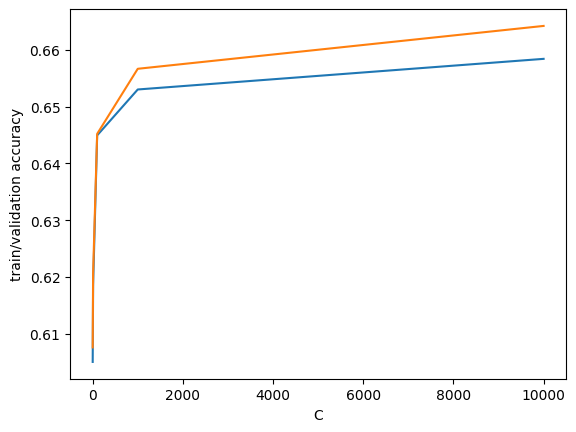

In [4]:
#linear svm
val_acc = []
train_acc = []
for c in c_list:
    model = svm.SVC(C=c, kernel='linear')
    cv_score = model_selection.cross_validate(model,X_normalized,data["Output"],cv=5,return_train_score=True)
    val_acc.append(np.mean(cv_score["test_score"]))
    train_acc.append(np.mean(cv_score["train_score"]))
plt.plot(c_list,val_acc)
plt.plot(c_list,train_acc)
plt.xlabel("C")
plt.ylabel("train/validation accuracy")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and 

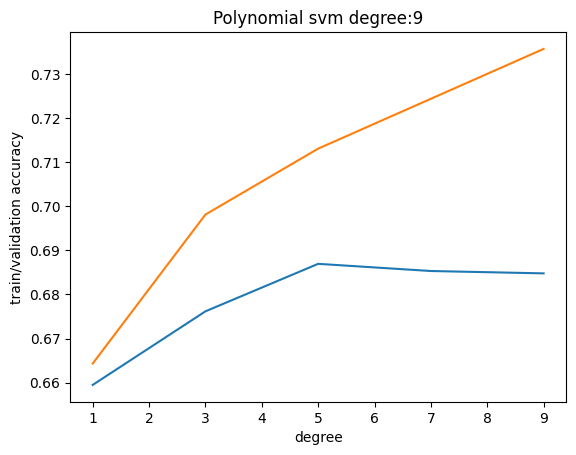

In [14]:
#polynomial svm
val_acc = []
train_acc = []
for d in degrees:
    #for c in c_list:
    model = svm.SVC(C=c, kernel='poly',degree=d)
    cv_score = model_selection.cross_validate(model,X_normalized,data["Output"],cv=5,return_train_score=True)
    val_acc.append(np.mean(cv_score["test_score"]))
    train_acc.append(np.mean(cv_score["train_score"]))
plt.plot(degrees,val_acc)
plt.plot(degrees,train_acc)
plt.title("Polynomial svm degree:" + str(d))
plt.xlabel("degree")
plt.ylabel("train/validation accuracy")
plt.show()